<a href="https://colab.research.google.com/github/Avit-hodibu/ml_process/blob/main/Process_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd

In [32]:
df= pd.read_csv('/content/placement.csv')

In [33]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# preprocessing
missing vlaue, outliers, unwanted col = we remove

prepare data to give to algo

In [34]:
# as we can see that there is one col name "unnamed" which is not used or add any value to preocess
# so we need to remove it
df= df.drop('Unnamed: 0',axis=1)
# or
# df= df.iloc[:, 1:] # all row but start col from index 1 to other



In [35]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [37]:
df.shape

(100, 3)

#EDA
using visual we find the hidden features or value or ideas

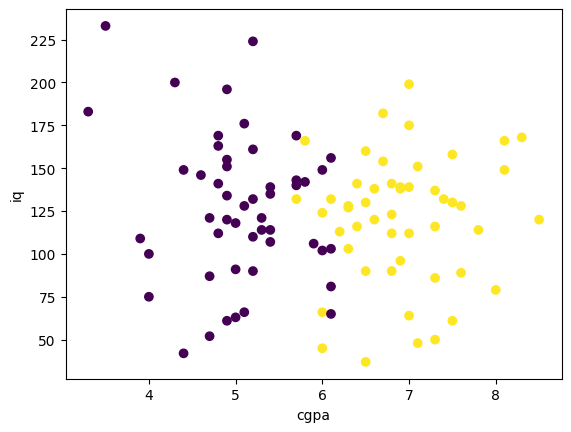

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'], c= df['placement'] )
#blue not placement 0, yellow placement 1.
x_title= 'cgpa'
y_title= 'iq'
plt.xlabel(x_title)
plt.ylabel(y_title)

plt.show()

From visual we understand that our data is linear. so we can seperate data linearly. we can use logistic regression.


# Feature selection

select only the needed columns

# Extract input and output col
seperated the input and output col


In [47]:
# we put  independent variable #input
X= df.iloc[:, 0:2]
#dependent variable #output
y= df['placement'] #df.iloc[:,-1]

In [50]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [49]:
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [51]:
X.shape

(100, 2)

In [52]:
y.shape

(100,)

# Scale the values
if there is a case where the values of cols vary largely the we scale

making value of all col in same range (mostly -1 to 1)


In [62]:
from sklearn.preprocessing import StandardScaler
# transform data to -1 to 1
scaler= StandardScaler()
#change from df to array
X= scaler.fit_transform(X)

In [64]:
X

array([[ 0.71095807, -0.01459341],
       [-0.0799718 , -0.44233119],
       [-0.60725838, -0.0649155 ],
       [ 1.23824465,  0.21185601],
       [-0.16785289,  0.46346647],
       [ 0.97460136, -1.90167186],
       [-0.25573399,  0.48862751],
       [-0.87090167, -1.52425617],
       [ 0.0957904 ,  0.81572111],
       [-0.78302057, -1.44877303],
       [ 0.0079093 , -1.977155  ],
       [ 0.79883917,  0.36282228],
       [-0.51937728,  0.38798333],
       [ 0.35943369, -0.19072073],
       [ 0.0957904 , -0.51781433],
       [-0.78302057,  1.31894203],
       [-0.69513948,  2.52667224],
       [-2.36488031,  1.49506935],
       [-1.74971264, -0.59329747],
       [-0.69513948,  0.21185601],
       [ 0.53519588, -0.09007654],
       [ 0.97460136,  0.68991588],
       [-0.95878277, -0.09007654],
       [-1.13454496, -0.92039106],
       [-1.13454496, -0.0649155 ],
       [-0.87090167, -0.81974688],
       [ 0.88672027,  1.89764609],
       [ 0.0079093 ,  0.01056764],
       [-0.69513948,

# Train test split
data is splited into train test where the train data use for creating the model
and remaning data, test data, is used for evaluation of data.


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

In [66]:
X_train

array([[ 0.71095807, -0.84490793],
       [ 0.79883917,  0.36282228],
       [-0.25573399,  1.14281471],
       [ 1.32612575, -1.57457826],
       [-0.95878277, -1.57457826],
       [ 0.97460136, -1.90167186],
       [-0.87090167, -0.81974688],
       [ 1.15036356, -1.85134977],
       [ 0.62307698,  0.76539902],
       [ 0.0079093 , -0.54297537],
       [ 1.85341233,  1.06733157],
       [-0.0799718 , -0.44233119],
       [-1.74971264, -0.59329747],
       [ 0.53519588,  0.36282228],
       [-0.25573399,  0.41314438],
       [ 0.0957904 , -1.07135734],
       [-0.25573399,  0.48862751],
       [-0.95878277,  0.68991588],
       [ 1.32612575,  0.8660432 ],
       [ 0.0079093 , -1.977155  ],
       [-0.51937728,  0.38798333],
       [ 2.02917452,  1.11765366],
       [-0.25573399,  0.21185601],
       [ 0.35943369,  0.43830542],
       [-1.48606935,  1.92280714],
       [ 0.88672027,  0.38798333],
       [-0.69513948,  0.21185601],
       [ 0.88672027,  1.89764609],
       [ 0.79883917,

In [68]:
X_test.shape

(20, 2)

# Train the model
create a model using training data

In [69]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [70]:
model.fit(X_train, y_train) # training model

LogisticRegression()

# Evaluate the model/ model selection
evaluate the model by using test.

we train some time model with differen algorithm so, at that time, we need to select the algo which give best accuracy when test or  evaluate  with test data.

In [71]:
# predicit the X_test
y_pred= model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
#90 % true

0.9

<Axes: >

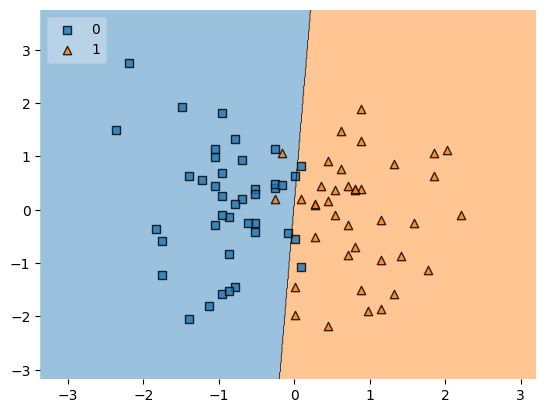

In [75]:
from operator import le
# to see the plot how the model predict
from mlxtend.plotting import plot_decision_regions
#since X_train is already in numpy array when scaling so donot need to change
#y_train is in datafame so need to change using .values
plot_decision_regions(X_train,y_train.values, clf= model, legend=2)

## exporting the model
in python everything is an object so the pickle convert object into file



In [76]:

import pickle
pickle.dump(model, open('model.pkl','wb'))
# this has create new file in the folder
#you can use this file

# Deploy the model
finaly we intregrate to website or app